# **Análisis exploratorio de datos del estudio**

## **Librerías**

In [1]:
from eda_auxiliary_functions import (make_general_histograms, 
                                 plot_stacked_barchart, 
                                 make_general_boxplots, 
                                 make_seasonal_decomposition,
                                 make_categories_pie_chart,
                                 count_outliers,
                                 replace_outliers,
                                 check_remove_duplicates,
                                 check_null_values)
import warnings
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.filterwarnings('ignore')

## **Análisis de dataset de generación / demanda de energía eléctrica en España**

### **Estructura general del dataset**

In [3]:
energy = pd.read_csv("./original_datasets/energy_dataset.csv")
print("Shape:", energy.shape)
energy.head(3)

Shape: (35064, 29)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48


### **Tipos de datos**

In [4]:
pd.DataFrame(energy.dtypes).T

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


**Observación:** La columna de tiempo "time" no está en formato *datetime*, se procede a convertirla

In [5]:
energy["time"] = pd.to_datetime(energy["time"].str[0:-6])

### **Revisión y limpieza de datos nulos**

In [6]:
check_null_values(energy)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
null_count,0.0,19.000000,18.000000,18.000000,18.000000,18.000000,19.000000,18.000000,18.000000,18.000000,35064.0,19.000000,19.000000,18.000000,19.000000,17.000000,18.000000,18.000000,18.000000,19.000000,18.000000,18.000000,0.0,35064.0,0.0,0.0,36.000000,0.0,0.0
null_percentage,0.0,0.054187,0.051335,0.051335,0.051335,0.051335,0.054187,0.051335,0.051335,0.051335,100.0,0.054187,0.054187,0.051335,0.054187,0.048483,0.051335,0.051335,0.051335,0.054187,0.051335,0.051335,0.0,100.0,0.0,0.0,0.102669,0.0,0.0


**Observación:** 

1. Las columnas *'generation hydro pumped storage aggregated'* y *'forecast wind offshore eday ahead'* están completamente conformadas por valores nulos, por lo que proceden a ser descartadas.

2. El resto de columnas tiene como máximo 36 filas con valores nulos, es decir únicamente 0.1% del total. Por lo que se procede a descartar dichas columnas para evitar ruido.

In [7]:
useless_columns = ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead']
energy = energy.drop(useless_columns, axis=1)

energy = energy.dropna()
print("Shape:", energy.shape)

Shape: (35017, 27)


### **Revisión y limpieza de duplicados**

In [8]:
energy = check_remove_duplicates(energy, ["time"], "last")

Se eliminaron 4 registros duplicados conservando por last.


### **Distribuciones generales de las variables numéricas**

In [9]:
energy.describe()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35013,35013.000000,35013.000000,35013.0,35013.000000,35013.000000,35013.000000,35013.0,35013.0,35013.0,35013.000000,35013.000000,35013.000000,35013.0,35013.000000,35013.000000,35013.000000,35013.000000,35013.000000,35013.0,35013.000000,35013.000000,35013.000000,35013.000000,35013.000000,35013.000000,35013.000000
mean,2017-01-01 02:20:41.847314176,383.529689,448.106132,0.0,5622.564419,4255.671265,298.337560,0.0,0.0,0.0,475.571302,972.153086,2604.777026,0.0,6264.077000,60.236769,85.650844,1433.254020,269.498386,0.0,5466.099477,1439.324251,5471.893297,28711.914403,28697.786051,49.869668,57.887554
min,2015-01-01 00:00:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,2016-01-02 02:00:00,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,0.000000,637.000000,1077.000000,0.0,5760.000000,53.000000,74.000000,71.000000,240.000000,0.0,2935.000000,69.000000,2980.000000,24795.000000,24809.000000,41.490000,49.360000
50%,2017-01-01 07:00:00,367.000000,509.000000,0.0,4968.000000,4473.000000,300.000000,0.0,0.0,0.0,68.000000,906.000000,2164.000000,0.0,6564.000000,57.000000,88.000000,616.000000,279.000000,0.0,4850.000000,576.000000,4856.000000,28905.000000,28902.000000,50.520000,58.020000
75%,2018-01-01 03:00:00,433.000000,757.000000,0.0,6429.000000,5837.000000,330.000000,0.0,0.0,0.0,616.000000,1250.000000,3756.000000,0.0,7024.000000,80.000000,97.000000,2579.000000,310.000000,0.0,7399.000000,2636.000000,7352.000000,32263.000000,32192.000000,60.530000,68.000000
max,2018-12-31 23:00:00,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000
std,NaN,85.304367,354.609239,0.0,2202.095477,1961.454399,52.470828,0.0,0.0,0.0,792.446352,400.732836,1834.910354,0.0,838.281347,20.236874,14.064361,1680.360012,50.145359,0.0,3213.681043,1677.900519,3176.543786,4591.827238,4573.643042,14.618889,14.190980


**Observación:** 
1. Las siguientes columnas están completamente conformadas por valores cero:
* 'generation fossil coal-derived gas'
* 'generation fossil oil shale'
* 'generation fossil peat'
* 'generation geothermal' 
* 'generation marine'
* 'generation wind offshore'
<br><br>

2. Dado que el objetivo del proyecto consta de realizar predicciones acorde a diversos lapsos de anticipación al mercado mayorista de electricidad, se opta por omitir las columnas que no hacen referencia a las condiciones del instante en que se realizaría la predicción real:
* 'forecast solar day ahead'
* 'forecast wind onshore day ahead'
* 'price actual'
* 'price day ahead'
* 'total load forecast'


<br>
Por lo tanto, se procede a eliminarlas las columnas previamente mencionadas no agregar ninguna información relevante al caso de estudio.

### **Depuración de columnas**

In [10]:
useless_columns = ['generation fossil coal-derived gas', 'generation fossil oil shale', 
                   'generation fossil peat', 'generation geothermal' , 
                  'generation marine', 'generation wind offshore',
                  'forecast solar day ahead', 'forecast wind onshore day ahead',
                    'price actual', 'price day ahead', 'total load forecast']
energy = energy.drop(useless_columns, axis=1)
print("Shape:", energy.shape)

Shape: (35013, 16)


### **Análisis gráfico de distribuciones de variables numéricas**

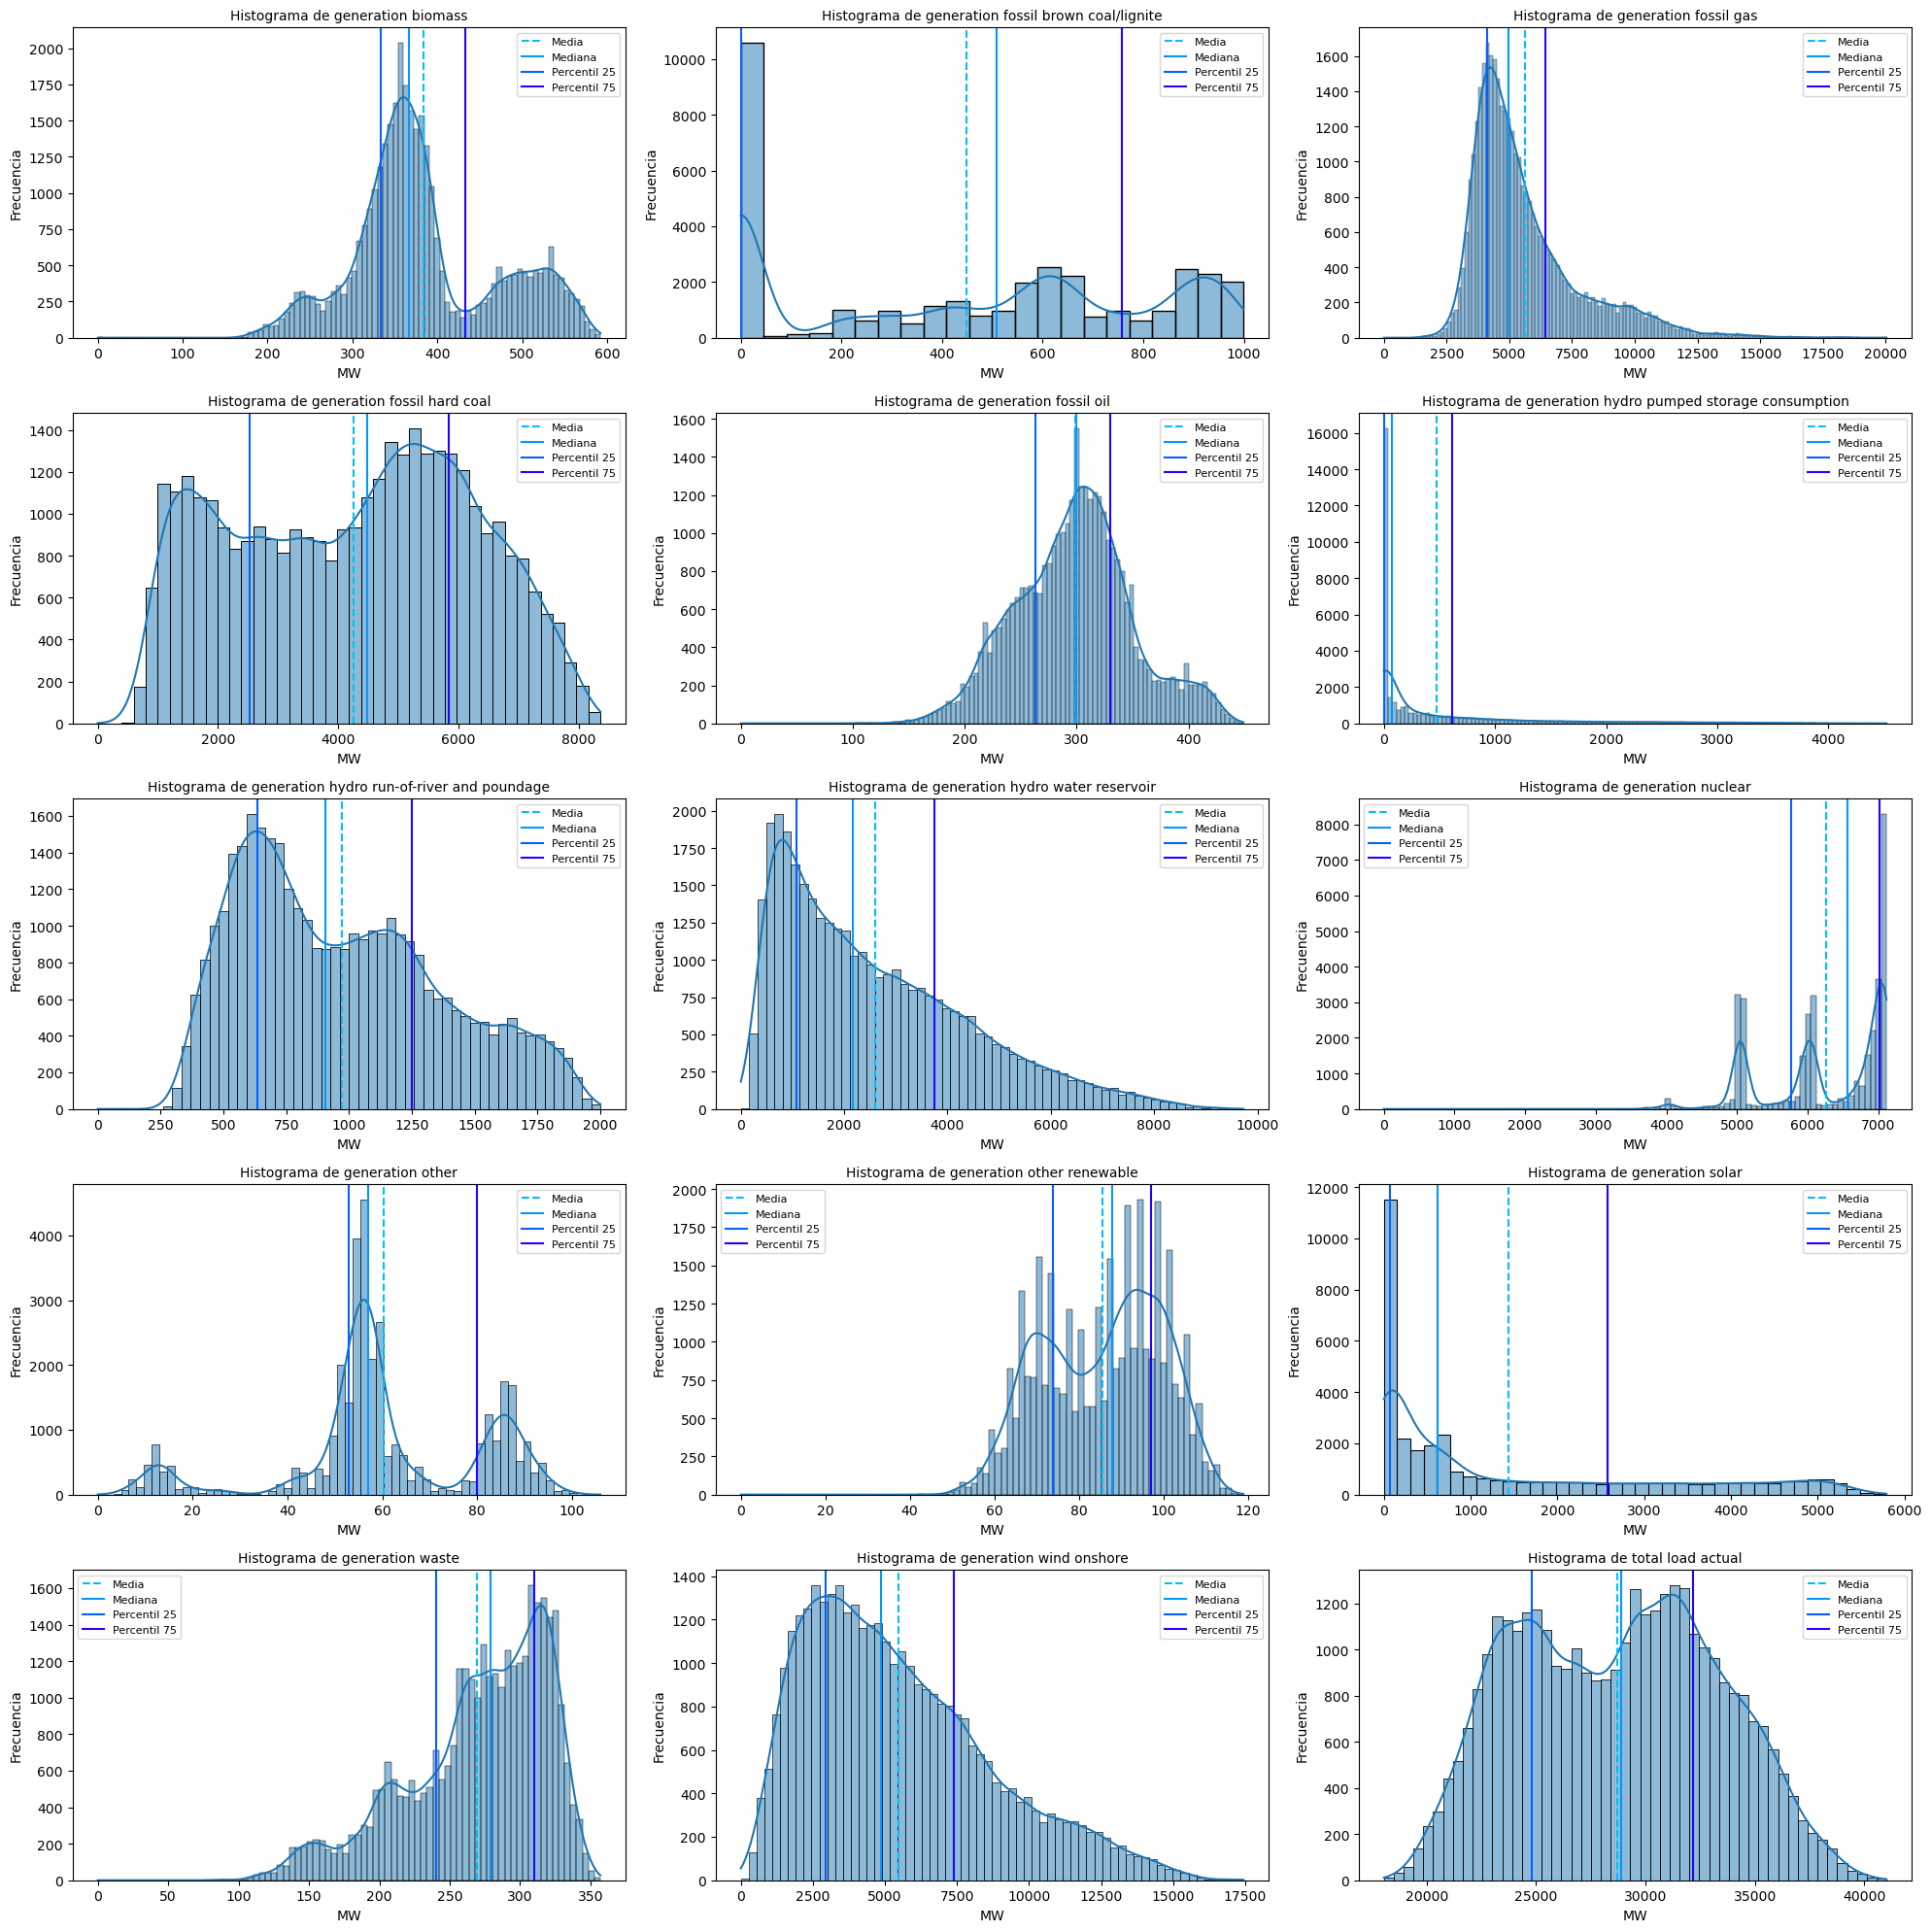

In [11]:
make_general_histograms(energy, figsize=(20, 20), xlabel="MW", group_cols_N=3)

### **Identificación y reemplazo de datos atípicos**

###
**Identificación**

Se buscan datos atípicos en múltiples columnas por fuera de 1.5 IQR.

In [12]:
count_outliers(energy)

,column,outlier_count
5,generation hydro pumped storage consumption,3759
2,generation fossil gas,2183
9,generation other,1265
13,generation wind onshore,379
7,generation hydro water reservoir,344
...,...,...
1,generation fossil brown coal/lignite,0
3,generation fossil hard coal,0
6,generation hydro run-of-river and poundage,0
11,generation solar,0


###
**Reemplazo**

Se procede a reemplazarlas por la **media** de la distribución.

In [13]:
energy = replace_outliers(energy)

### **Análisis de acumulación mensual por tipo de generación de energía**

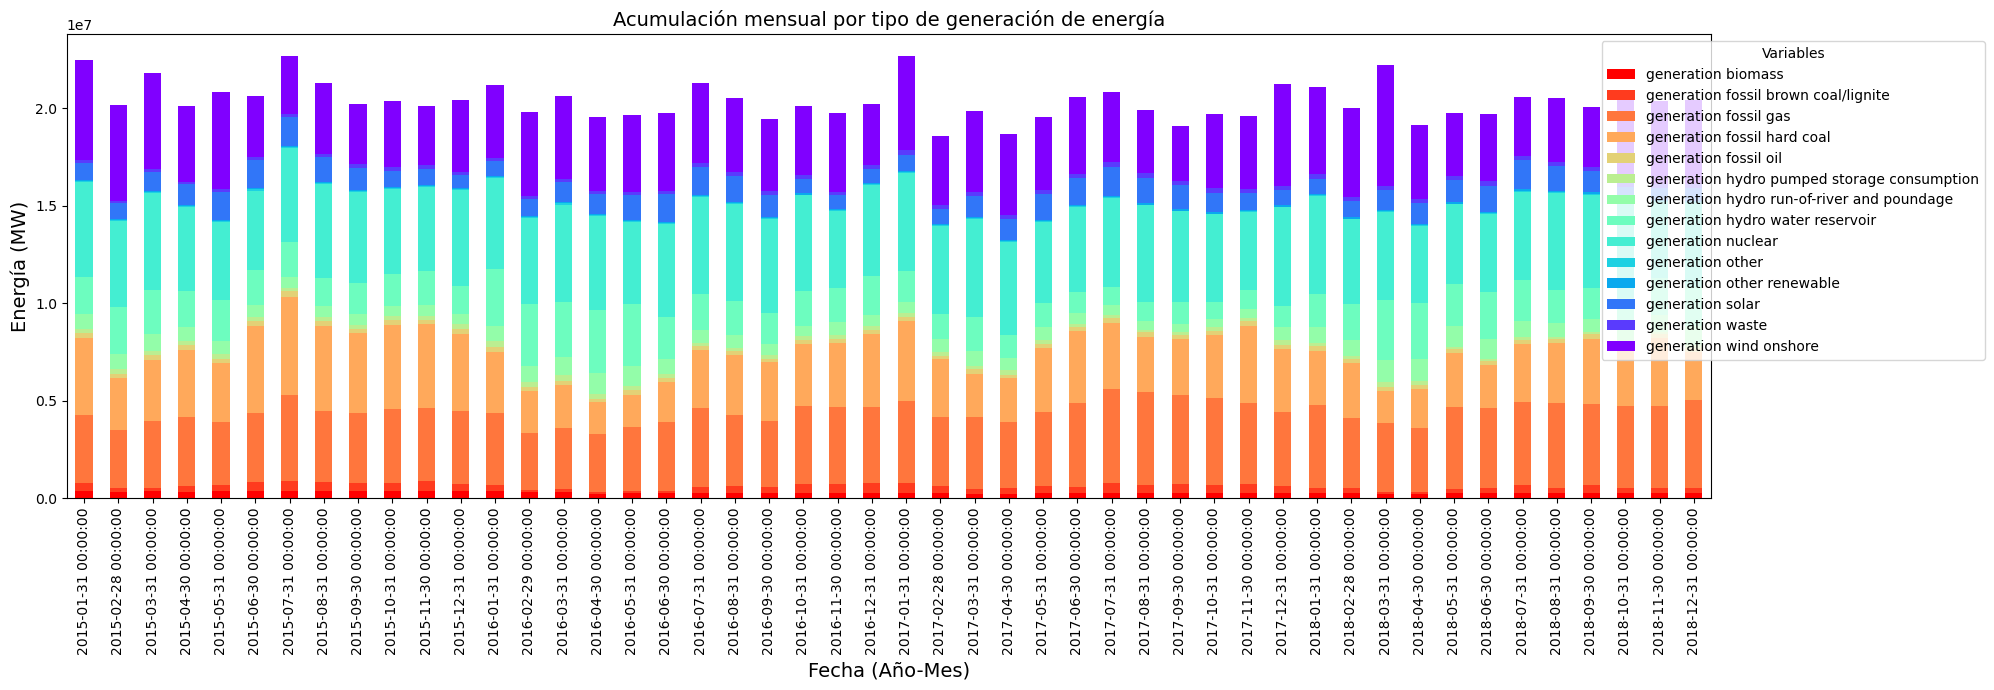

In [14]:
generation_cols = [value for value in energy.columns.tolist() if 'generation' in value]
plot_stacked_barchart(energy, generation_cols, frequency='M', figsize=(20, 7), 
                      title="Acumulación mensual por tipo de generación de energía", 
                      ylabel="Energía (MW)", 
                      xlabel="Fecha (Año-Mes)")

### **Descomposición estacional de demanda total de energía**

####
**Descomposición anual**

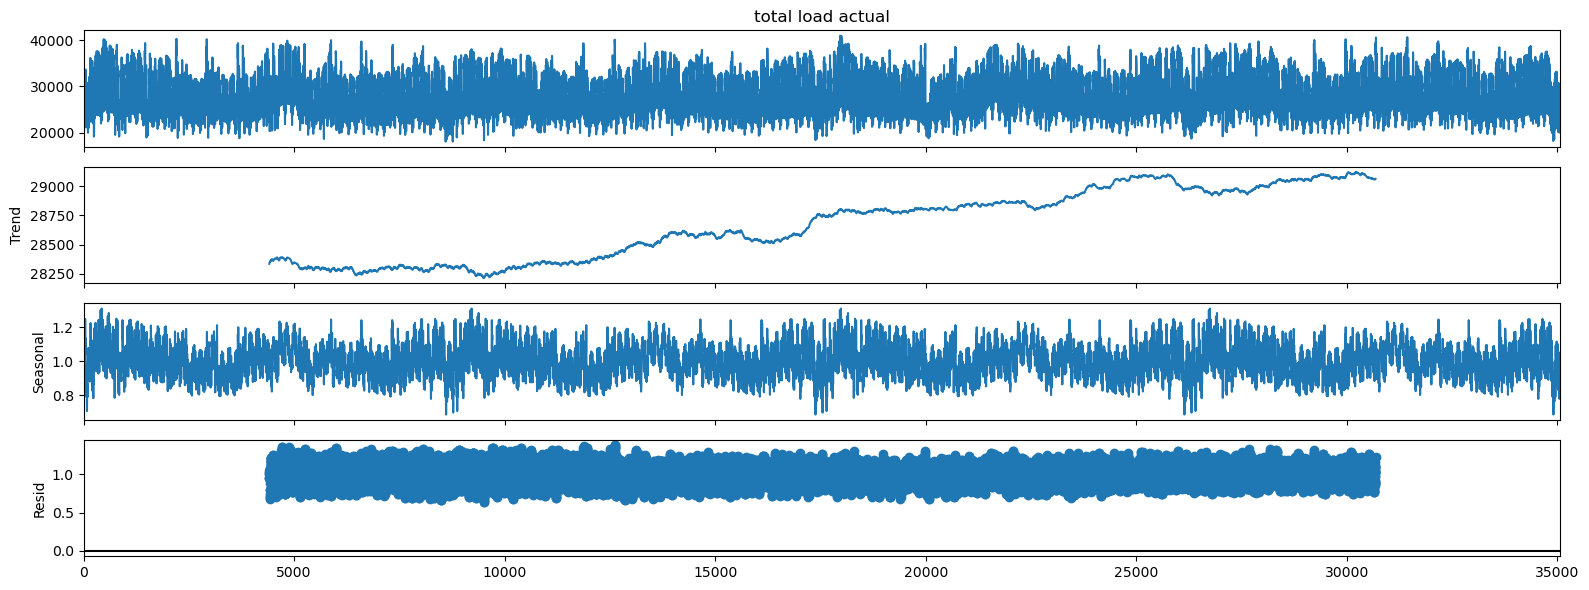

In [15]:
input_data = energy["total load actual"].fillna(method="ffill")
make_seasonal_decomposition(input_data, model='multiplicative', period=365*24)

####
**Descomposición semanal**

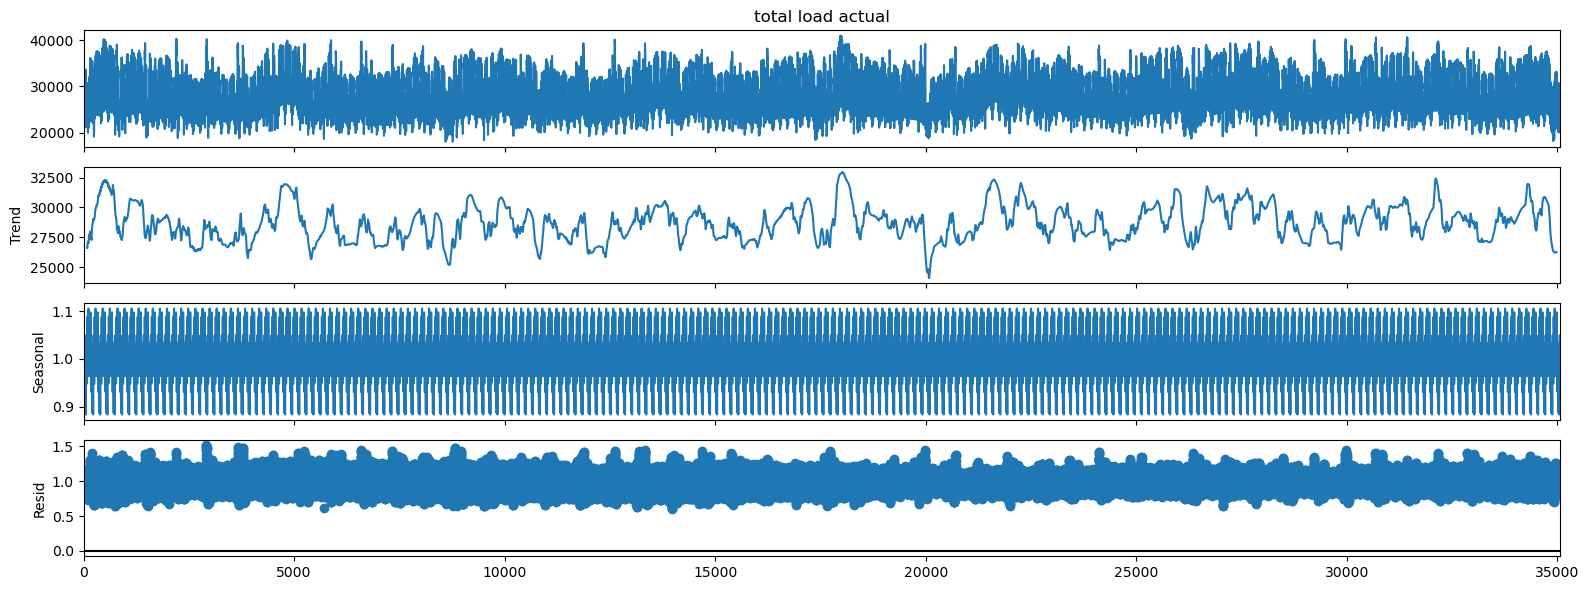

In [16]:
input_data = energy["total load actual"].fillna(method="ffill")
make_seasonal_decomposition(input_data, model='multiplicative', period=7*24)

### **Almacenamiento de dataset limpio**

In [17]:
energy.to_pickle('./clean_datasets/energy_clean_dataset.pkl')

==============================================================================================================================

## **Análisis de dataset de información meteorológica / climática en España**

### **Estructura general del dataset**

In [18]:
weather = pd.read_csv("./original_datasets/weather_features.csv")
print("Shape:", weather.shape)
weather.head(3)

Shape: (178396, 17)


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### **Tipos de datos**

In [19]:
pd.DataFrame(weather.dtypes).T

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,object,object,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,object,object,object


**Observación:** La columna de tiempo "dt_iso" no está en formato *datetime*, se procede a convertirla y cambiar su nombre a "time"

In [20]:
weather["time"] = pd.to_datetime(weather["dt_iso"].str[0:-6])
weather = weather.drop("dt_iso", axis=1)

### **Revisión y limpieza de datos nulos**

In [21]:
check_null_values(weather)

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,time
null_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
null_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Revisión y limpieza de duplicados**

In [22]:
weather = check_remove_duplicates(weather, ["time", "city_name"], "last")

Se eliminaron 3096 registros duplicados conservando por last.


### **Distribuciones generales de las columnas numéricas**

In [23]:
weather.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,time
count,175300.000000,175300.000000,175300.000000,1.753000e+05,175300.000000,175300.000000,175300.000000,175300.000000,175300.000000,175300.000000,175300.000000,175300.000000,175300
mean,289.708181,288.428881,291.172867,1.070205e+03,68.030371,2.470143,166.725163,0.069312,0.000386,0.004847,24.344803,763.838403,2016-12-31 11:46:00.068454144
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,2015-01-01 00:00:00
25%,283.830000,282.785836,284.912000,1.013000e+03,53.000000,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,800.000000,2016-01-01 05:45:00
50%,289.150000,288.150000,290.150000,1.018000e+03,71.000000,2.000000,178.000000,0.000000,0.000000,0.000000,16.000000,800.000000,2016-12-31 11:30:00
75%,295.240000,294.150000,297.150000,1.022000e+03,87.000000,4.000000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000,2017-12-31 17:15:00
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.000000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000,2018-12-31 23:00:00
std,8.025089,7.948478,8.614051,6.022112e+03,21.838153,2.095206,116.546505,0.385936,0.007349,0.224560,30.339433,102.926057,NaN


### **Análisis gráfico de distribuciones de variables numéricas**

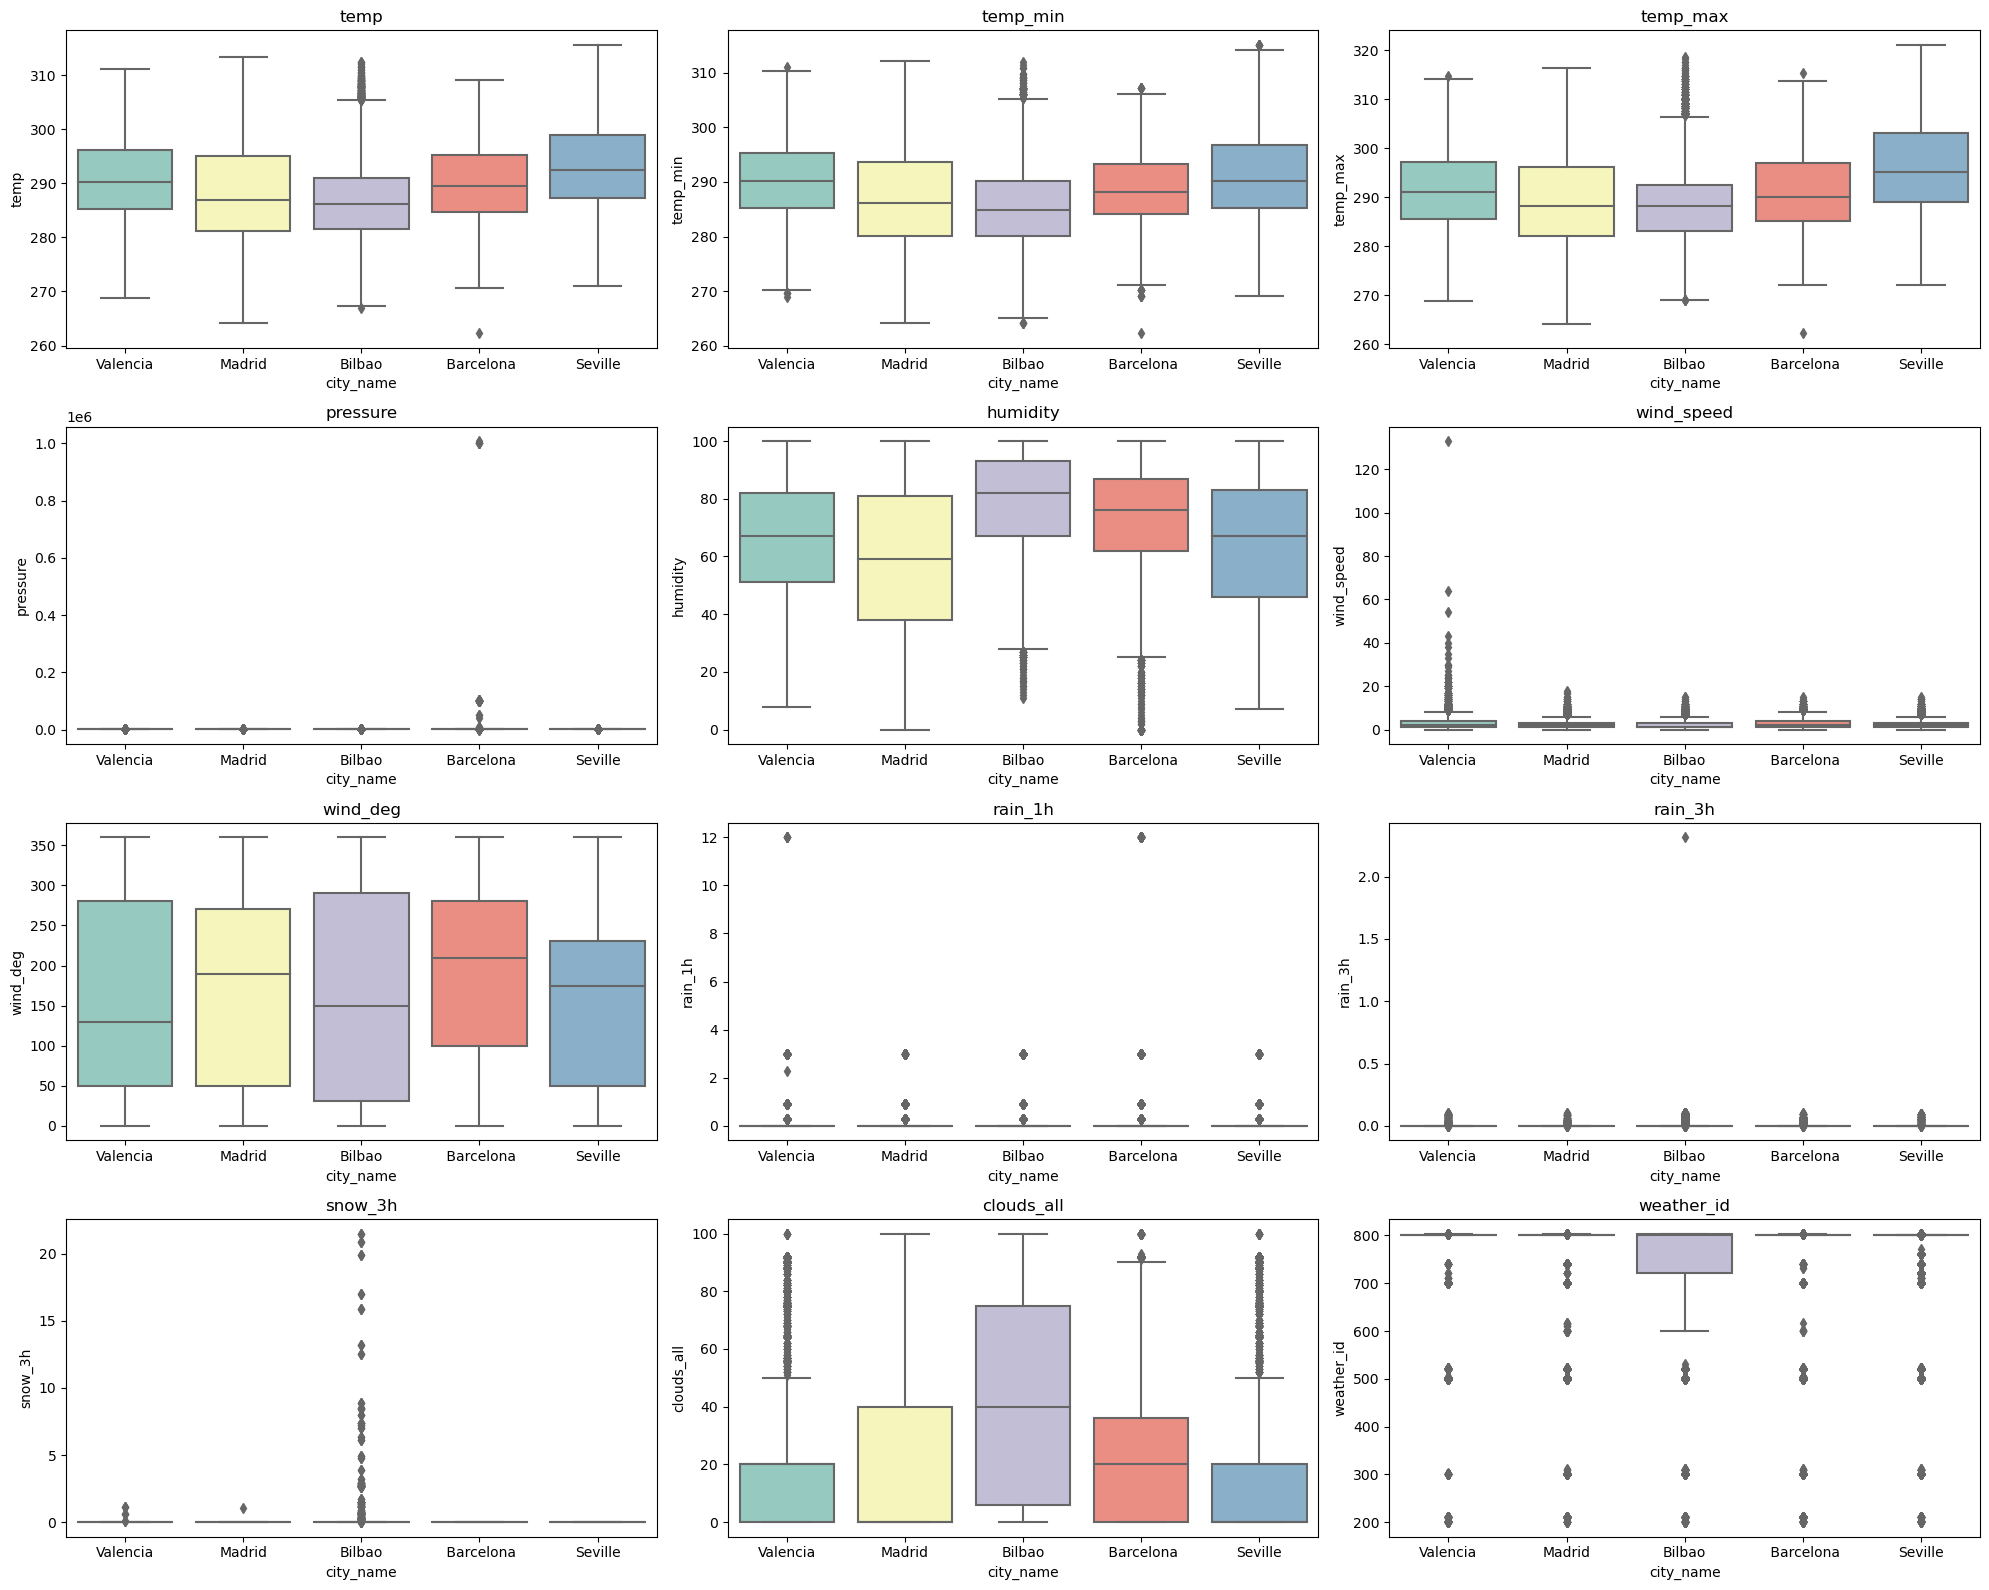

In [24]:
make_general_boxplots(weather, figsize=(20, 16))

### **Identificación y reemplazo de datos atípicos**


###
**Identificación**

Se buscan datos atípicos en múltiples columnas por fuera de 1.5 IQR.

In [25]:
count_outliers(weather)

,column,outlier_count
11,weather_id,44603
7,rain_1h,17390
3,pressure,11645
5,wind_speed,2378
8,rain_3h,1854
...,...,...
0,temp,202
1,temp_min,154
4,humidity,63
6,wind_deg,0


###
**Reemplazo**

Se procede a reemplazarlas por la **media** de la distribución.

In [26]:
weather = replace_outliers(weather)

### **Descomposición estacional de mediciones meteorológicas**

####
**Temperatura**

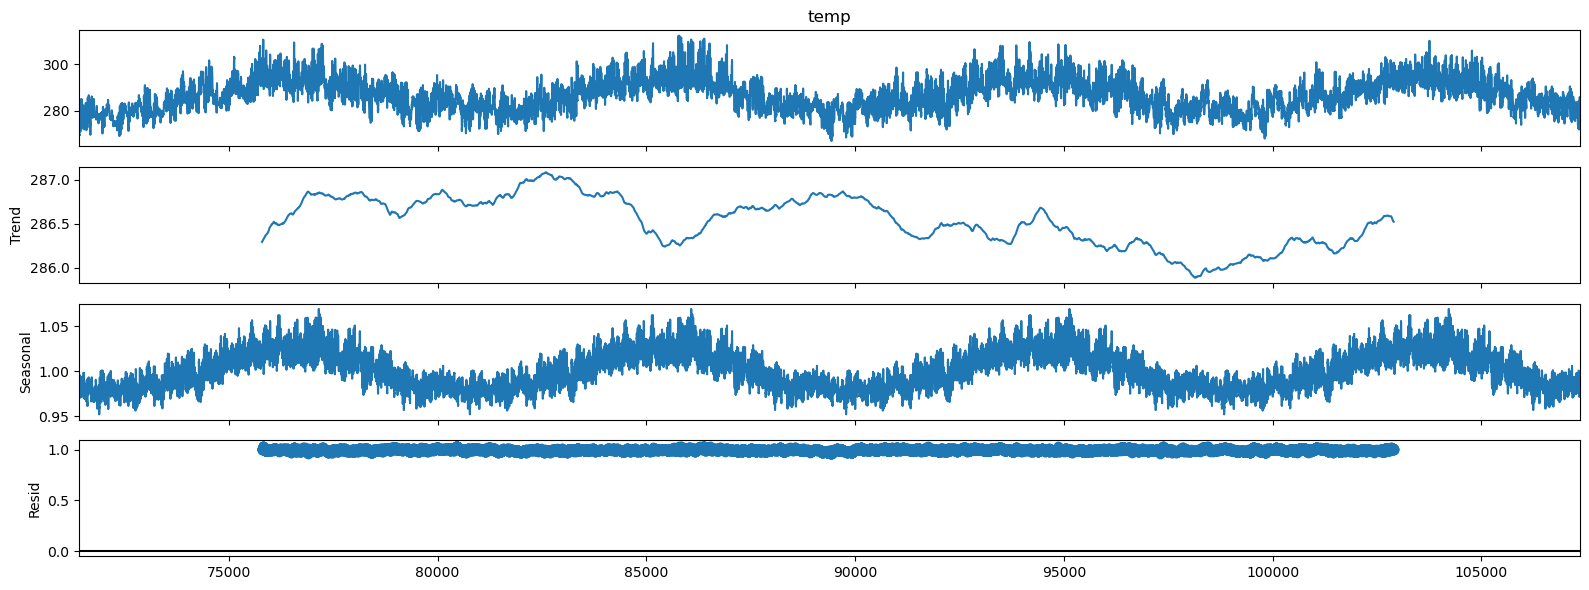

In [27]:
input_data = weather[weather["city_name"]=="Bilbao"]["temp"]
make_seasonal_decomposition(input_data, model='multiplicative', period=365*24)

####
**Porcentaje de nubes**

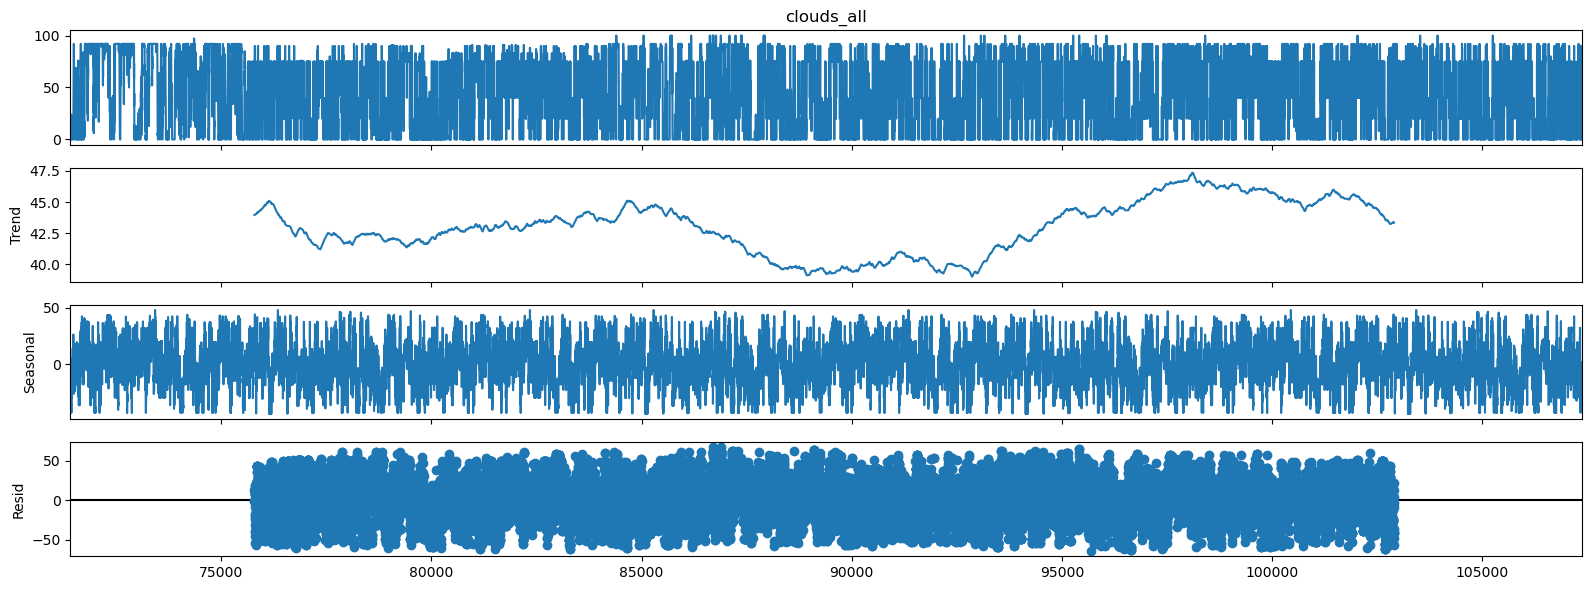

In [28]:
input_data = weather[weather["city_name"]=="Bilbao"]["clouds_all"]
make_seasonal_decomposition(input_data, model="additive", period=365*24)

### **Distribuciones generales de las columnas categóricas (textuales)**

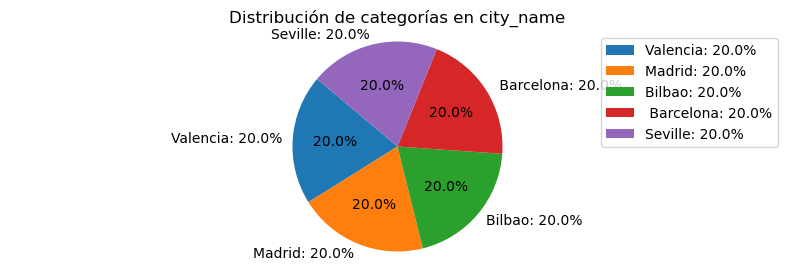

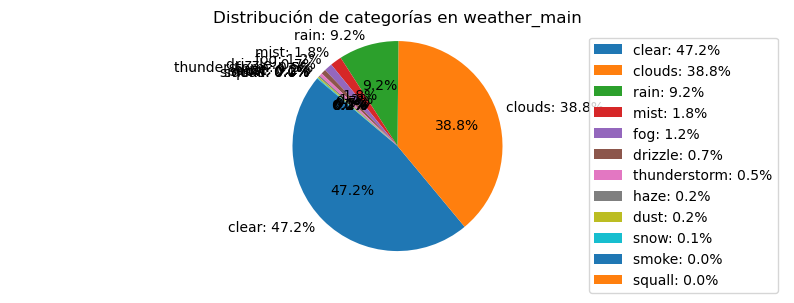

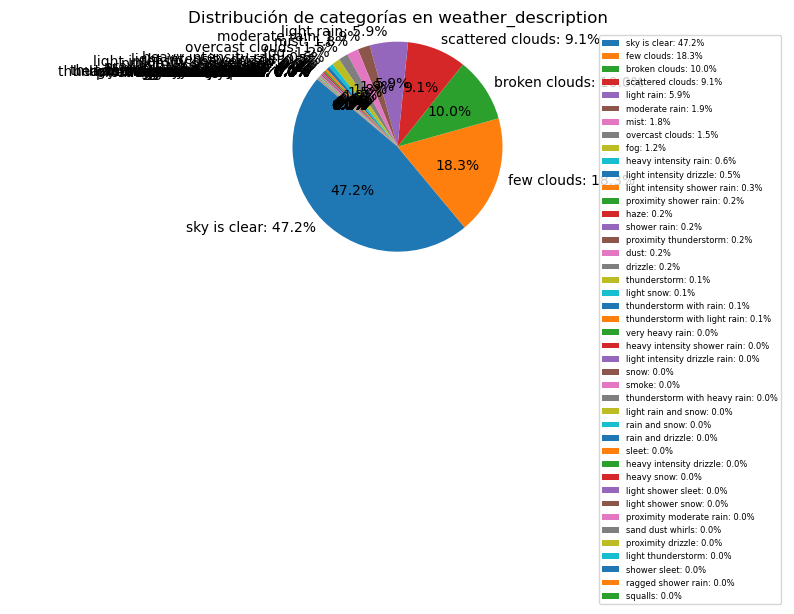

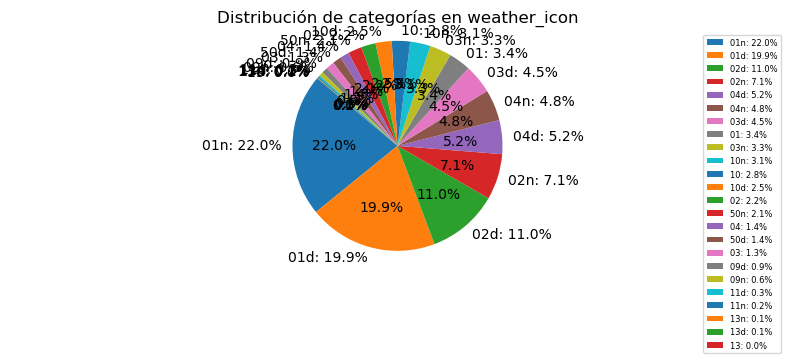

In [29]:
make_categories_pie_chart(weather, figsize=(10, 3))

**Observación:**

Las variables *'weather_icon'* y *'weather_id*', *'weather_main'*, *'weather_description'* únicamente son etiquetas textuales de lo ya representado en las columnas numéricas de las otras variables. De manera que no tienen un aporte significativo de información para el fenómeno a modelar. Por el principio de parsimonia, se procede a descartar dichas columnas para la fase de modelado.

In [30]:
weather = weather.drop(["weather_icon", "weather_id", "weather_main", "weather_description"], axis = 1)

### **Almacenamiento de dataset limpio**

In [31]:
weather.to_pickle('./clean_datasets/weather_clean_dataset.pkl')